<a href="https://colab.research.google.com/github/govind-bo/govind-bo/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis using Python - Project 1
In this project, loading, cleaning and exploratory data analysis is performed on Diwali sales data using python and it's libraries namely - Pandas, NumPy, Seaborn and Matplotlib.  


---



##Pre Analysis

###Loading the data

In [1]:
#Below the libraries are imported.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the csv file below. The file is stored on google drive.
path = "/content/drive/MyDrive/Colab Notebooks/dataset/Diwali Sales Data.csv"
df = pd.read_csv(path, encoding = 'unicode_escape')

###Cleaning the data
After importing the data, the next step is to clean the data and make it fit for analysis.


> Before performing any action, it is important to first observe the data, and understand what cleaning steps need to be taken. So we will first observe and understand the data set.



In [3]:

df.shape    #the shape function will give us the number of rows and columns present in the data

(11251, 15)

In [4]:
df.head(7)     #The head function returns the number of rows specified, the default is 5

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.0,NaN,NaN


In [5]:
df.info()
""".info() will return a concise summary of the DataFrame,
            including the data types of each column, the number of non-null values, and memory usage."""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


'.info() will return a concise summary of the DataFrame,\n            including the data types of each column, the number of non-null values, and memory usage.'

From the output of df.info()  for cleaning the dataset it can be concluded that:



1.   Columns - 'Status' & 'unnamed1' has to be removed as they do not contain any non null row.
2.   There are 12 Null values in the 'Amount' column, and 'unnamed1' also needs to be removed
3.   Since User_ID doesn't really serve a quantitative purpose, the data type should be changed to string.
  By doing so, the .describe() function will summarise the truly quantitative data only.
4.    The Marital_Status column is a quantitative column with 0 for unmarried and 1 for married. It has to be updated to show married or non married.





In [6]:
#the Null values in a data frame can also be calculated using the .isnull function
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
#drop unrelated columns
df.drop(['Status','unnamed1'],axis = 1, inplace = True)

In [8]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# drop null values
df.dropna(inplace = True)

In [10]:
#check for null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
#change data type of Amount to int64
df['Amount']=df['Amount'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [13]:
df['User_ID']=df['User_ID'].astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  object
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


In [15]:
df['Marital_Status'].unique() #to confirm that the column has only 0 and 1.

array([0, 1])

In [16]:
#to update 'Marital_Staus' .replace() can be used, it'll change the data type of the column as well
df['Marital_Status'].replace({0:"Unmarried", 1: "Married"},inplace = True)

#it is important to not miss the inplace argument, without which the change will not be made to the actual dataframe.
#another way to make the change permanent is :
# df['col_name']=df['col_name'].replace()

In [17]:
df['Orders'].unique()   #to check all distinct values present in 'Orders'

array([1, 3, 2, 4])

In [18]:
df['Orders'].mode()     #to see how many orders are placed most of the times.

0    2
Name: Orders, dtype: int64

In [19]:
df['Orders'].value_counts()   #to get frequency of all the distinct values present in the dataframe

2    2893
1    2808
4    2773
3    2765
Name: Orders, dtype: int64

In [20]:
df.describe()   #.describe will return a summary of the numeric columns of the data frame

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [21]:
#describe() method can be used for specific columns as well
#Order is excluded from describe as it only has 4 distinct values.
df[['Age','Amount']].describe()

,Age,Amount
count,11239.000000,11239.000000
mean,35.410357,9453.610553
std,12.753866,5222.355168
min,12.000000,188.000000
25%,27.000000,5443.000000
50%,33.000000,8109.000000
75%,43.000000,12675.000000
max,92.000000,23952.000000


The .describe() method gives an insight into the data frame. The following facts can be understood about the dataframe:
1. Age
> * The youngest consumer in the data set is 12 yrs old and the oldest is 92 years old. It means we have a dataset with people of diverse age which is good for our analysis.
> * Average age of the consumers is 35 years old. Most of the consumers are in the age group of 27 to 43 years.
2. Amount
>* Average sale per order is 9,454. Min order was for 188 and highest for 23,952.
>* Most of the sale amount lie in the range of 5,443 to 12,675


## Exploratory Data Analysis
After loading and cleaning the data, the data is now ready for Exploratory Data Analysis. It is used to summarise characterstics of the data, and understand its structure, patterns, distributions and relationship between variables.

###Gender

<ipython-input-22-21cd583b8bf7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Gender', data = df, palette = 'muted')     #['pink','skyblue'])


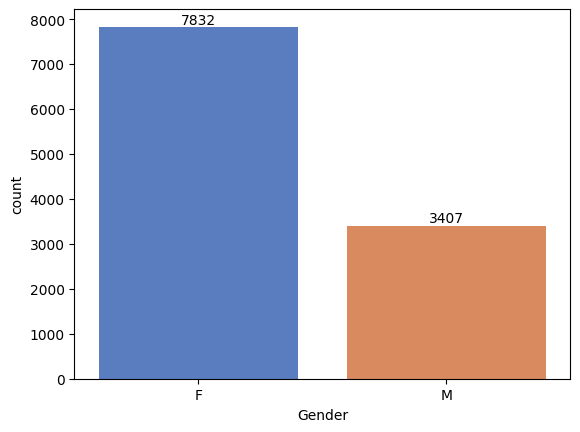

In [22]:
#bar char for gender
ax = sns.countplot(x = 'Gender', data = df, palette = 'muted')     #['pink','skyblue'])
for bars in ax.containers:        #to add labels to bars
  ax.bar_label(bars)

<ipython-input-23-9f40d4e44d06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Gender', y = 'Amount', data = ax, palette = 'deep')


<Axes: xlabel='Gender', ylabel='Amount'>

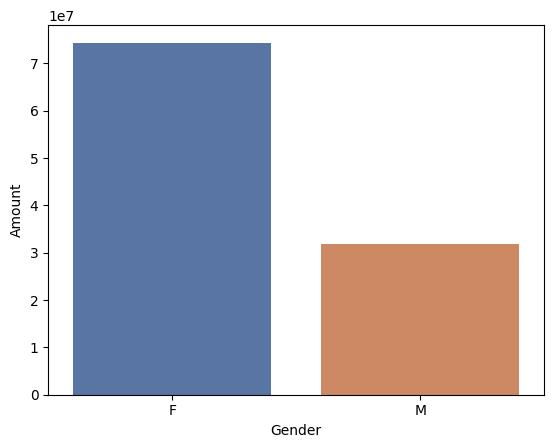

In [23]:
#bar chart for gender v/s total amount
ax = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = ax, palette = 'deep')


From the above graphs we can see that female buyers are more than male buyers. And also the purchasing power of female buyers is more than male buyers.

###Age

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

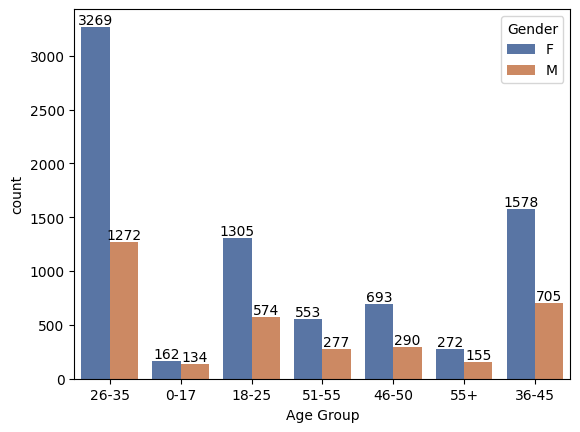

In [25]:
ax = sns.countplot(x="Age Group", data = df, hue = 'Gender', palette = 'deep')
for bars in ax.containers:
  ax.bar_label(bars)

In the above graph, the age group in x axis is not ordered properly. To make the visual more user friendly, age group has to be ordered in ascending order.

In [26]:
#check the distinct values present in Age Group
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '51-55', '46-50', '55+', '36-45'],
      dtype=object)

It can be seen from the output of above code, or the visual above that we have 7 distinct age categories

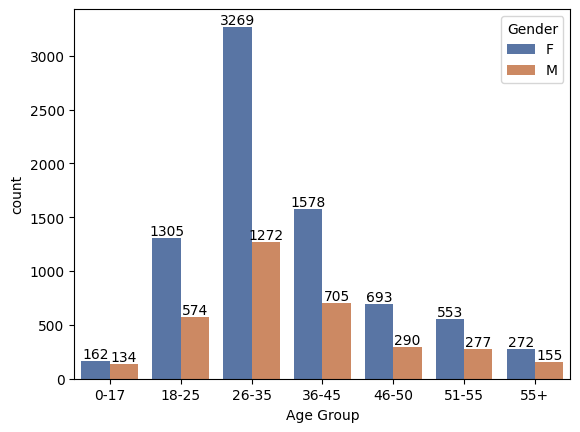

In [27]:
#Sort the x axis in ascending order
ax = sns.countplot(x="Age Group", data = df, hue = 'Gender',
                   order = sorted(df['Age Group']), palette = 'deep')
for bars in ax.containers:
  ax.bar_label(bars)

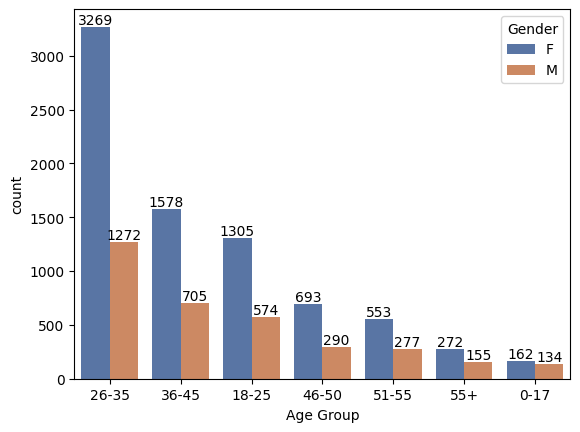

In [28]:
#the x axis can be sorted by labels as well
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',
                   order = df['Age Group'].value_counts().index,
                   palette = 'deep')
for bars in ax.containers:
  ax.bar_label(bars)

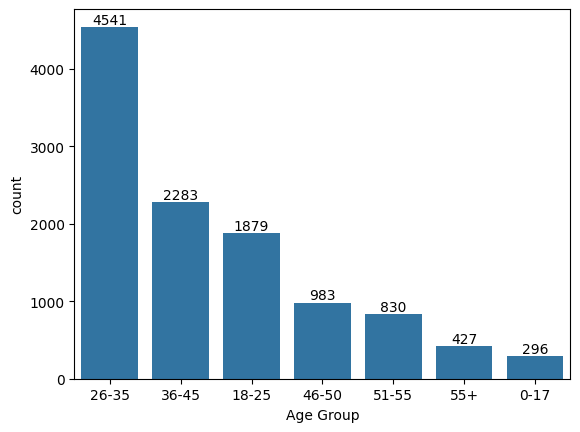

In [29]:
ax = sns.countplot(data=df, x = 'Age Group', order = df['Age Group'].value_counts().index)
for bars in ax.containers:
  ax.bar_label(bars)

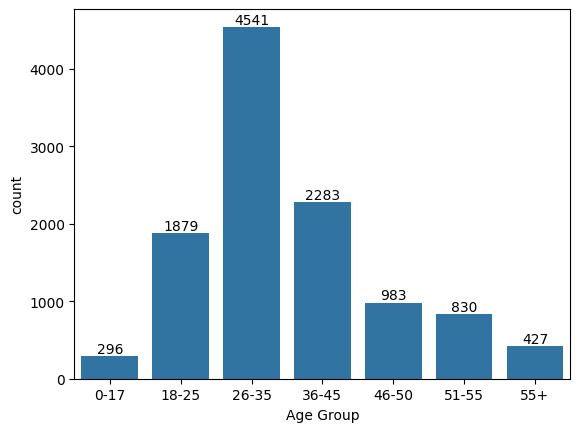

In [30]:
ax = sns.countplot(data=df, x = 'Age Group', order = sorted(df['Age Group']))
for bars in ax.containers:
  ax.bar_label(bars)

From any of the above four visual we can see that the majority of the consumers lie in the age group 26 - 45, which was also seen using df['Age Group'].describe()

<ipython-input-31-c8936f261391>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_age, x = 'Age Group', y ='Amount', palette = 'deep')


<Axes: xlabel='Age Group', ylabel='Amount'>

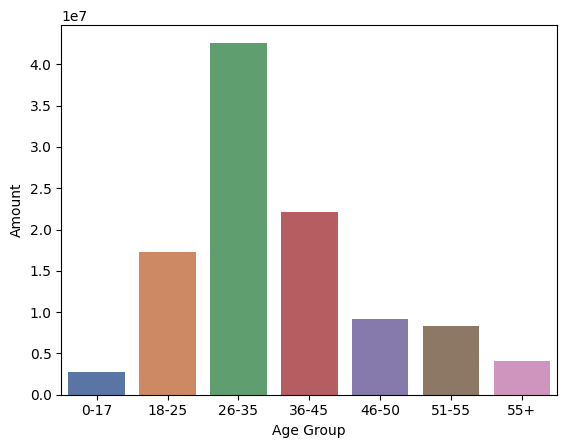

In [31]:
#Total amount vs Age group
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum()
sns.barplot(data = sales_age, x = 'Age Group', y ='Amount', palette = 'deep')

<ipython-input-32-6b8f6d2e6b75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_age, x = 'Age Group', y = 'Amount', palette = 'deep')


<Axes: xlabel='Age Group', ylabel='Amount'>

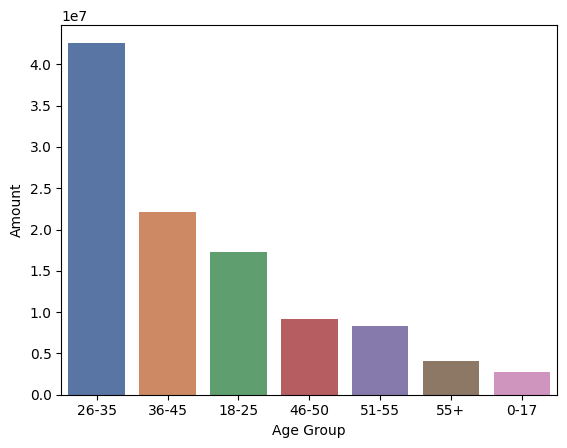

In [32]:
#Total amount vs age group sorted from max amount to lowest
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(
                        by = 'Amount', ascending = False)
sns.barplot(data = sales_age, x = 'Age Group', y = 'Amount', palette = 'deep')

<Axes: xlabel='Age Group', ylabel='Amount'>

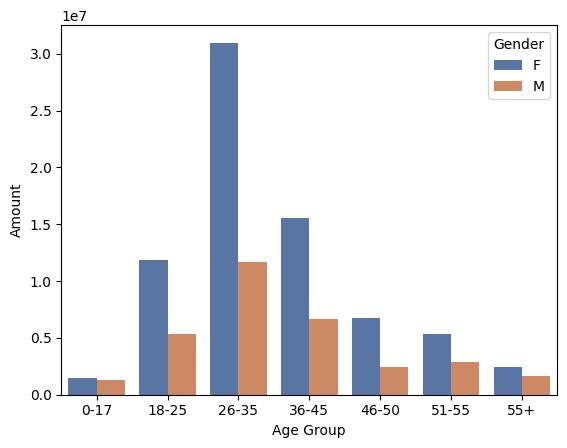

In [33]:
#Total amount vs age group and gender sorted from max amount to lowest
sales_age = df.groupby(['Age Group','Gender'], as_index = False)['Amount'].sum()
sns.barplot(data = sales_age, x = 'Age Group', y = 'Amount',hue = 'Gender', palette = 'deep')

From the above visuals, it can be seen that most buyers are of the age group 26-35, and their purchasing power is also the greatest, followed by 36-45 age group.

In [34]:
#Total Amount vs age group
age_amount = df.groupby(['Age Group','Gender'])['Amount'].sum()
age_amount

Age Group  Gender
0-17       F          1441409
           M          1258244
18-25      F         11887003
           M          5353729
26-35      F         30963953
           M         11649489
36-45      F         15509956
           M          6635038
46-50      F          6743393
           M          2464451
51-55      F          5385208
           M          2876269
55+        F          2404931
           M          1676056
Name: Amount, dtype: int64

###State

In [35]:
#total number of orders from the top 10 states
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


In [36]:
sales_state = df.groupby(['State'])['Amount'].sum().sort_values( ascending = False).head(10)
sales_state

State
Uttar Pradesh       19374968
Maharashtra         14427543
Karnataka           13523540
Delhi               11603818
Madhya Pradesh       8101142
Andhra Pradesh       8037146
Himachal Pradesh     4963368
Haryana              4220175
Bihar                4022757
Gujarat              3946082
Name: Amount, dtype: int64

<ipython-input-37-6d9d9c4cb125>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x= 'State', y = 'Amount', palette = 'deep', order = sorted(sales_state['State']))


<Axes: xlabel='State', ylabel='Amount'>

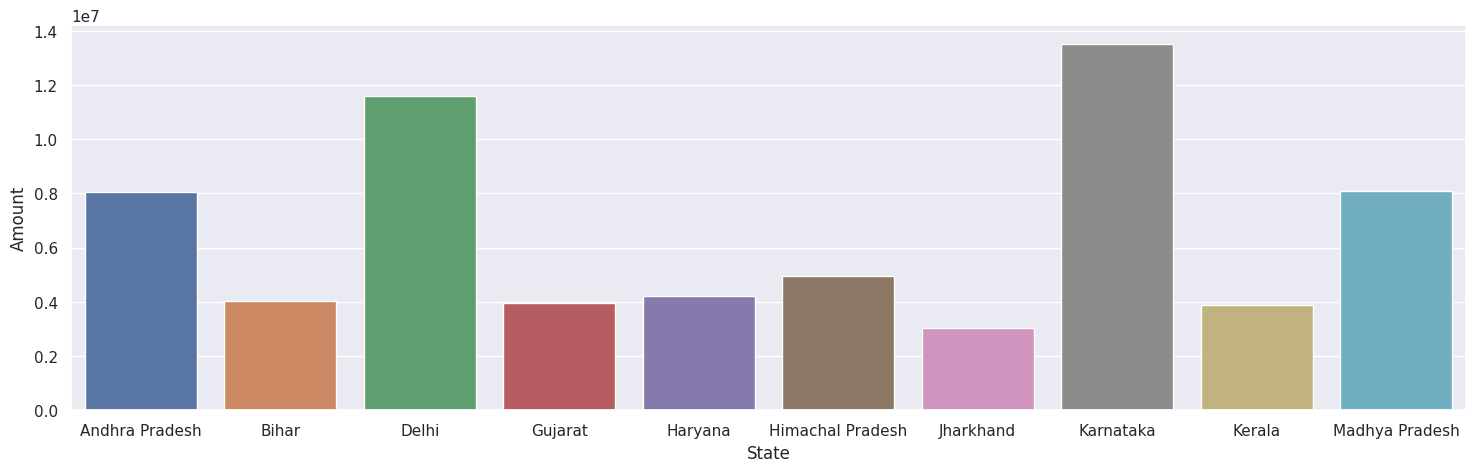

In [37]:
#sales amount from top 10 states alphabetically ordered by state
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().head(10)
sns.set(rc = {'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x= 'State', y = 'Amount', palette = 'deep', order = sorted(sales_state['State']))

<ipython-input-38-20dab39aeaad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x= 'State', y = 'Amount', palette = 'deep')


<Axes: xlabel='State', ylabel='Amount'>

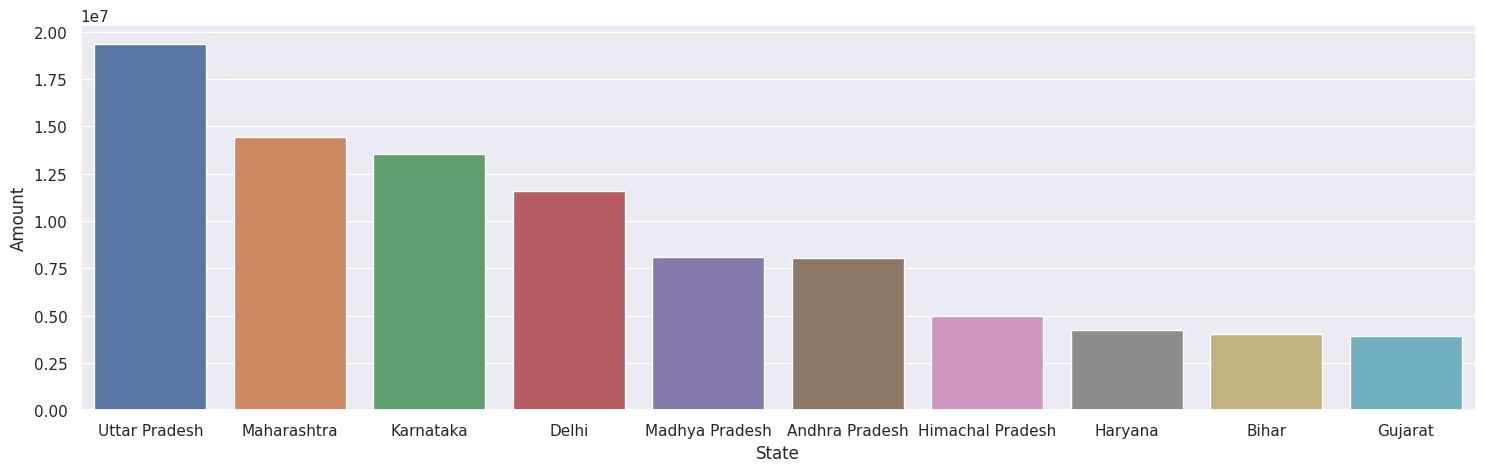

In [38]:
#sales amount from top 10 states ordered by amount.
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(
                       by = 'Amount',ascending = False).head(10)
sns.set(rc = {'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x= 'State', y = 'Amount', palette = 'deep')

<ipython-input-39-7cfc5b978366>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = order_state, x = 'State', y = 'Orders', palette = 'deep')


<Axes: xlabel='State', ylabel='Orders'>

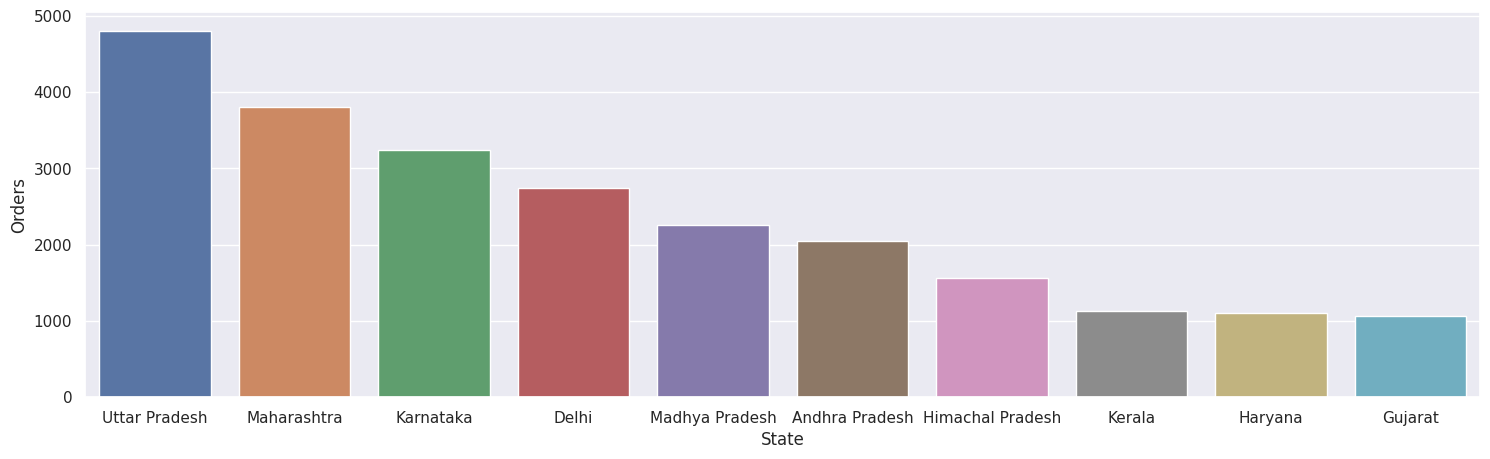

In [39]:
#total number of orders from top 10 states
order_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.barplot(data = order_state, x = 'State', y = 'Orders', palette = 'deep')

From the above two graphs, it can be seen that most of the orders have come form the states Uttar Pradesh, Maharashtra, Karnataka. It can also be observed that eventhough Kerala has more number of orders than Haryana, Haryana has spent more amount. The same can be seen for Bihar and Gujarat as well.

<Axes: xlabel='State', ylabel='Amount'>

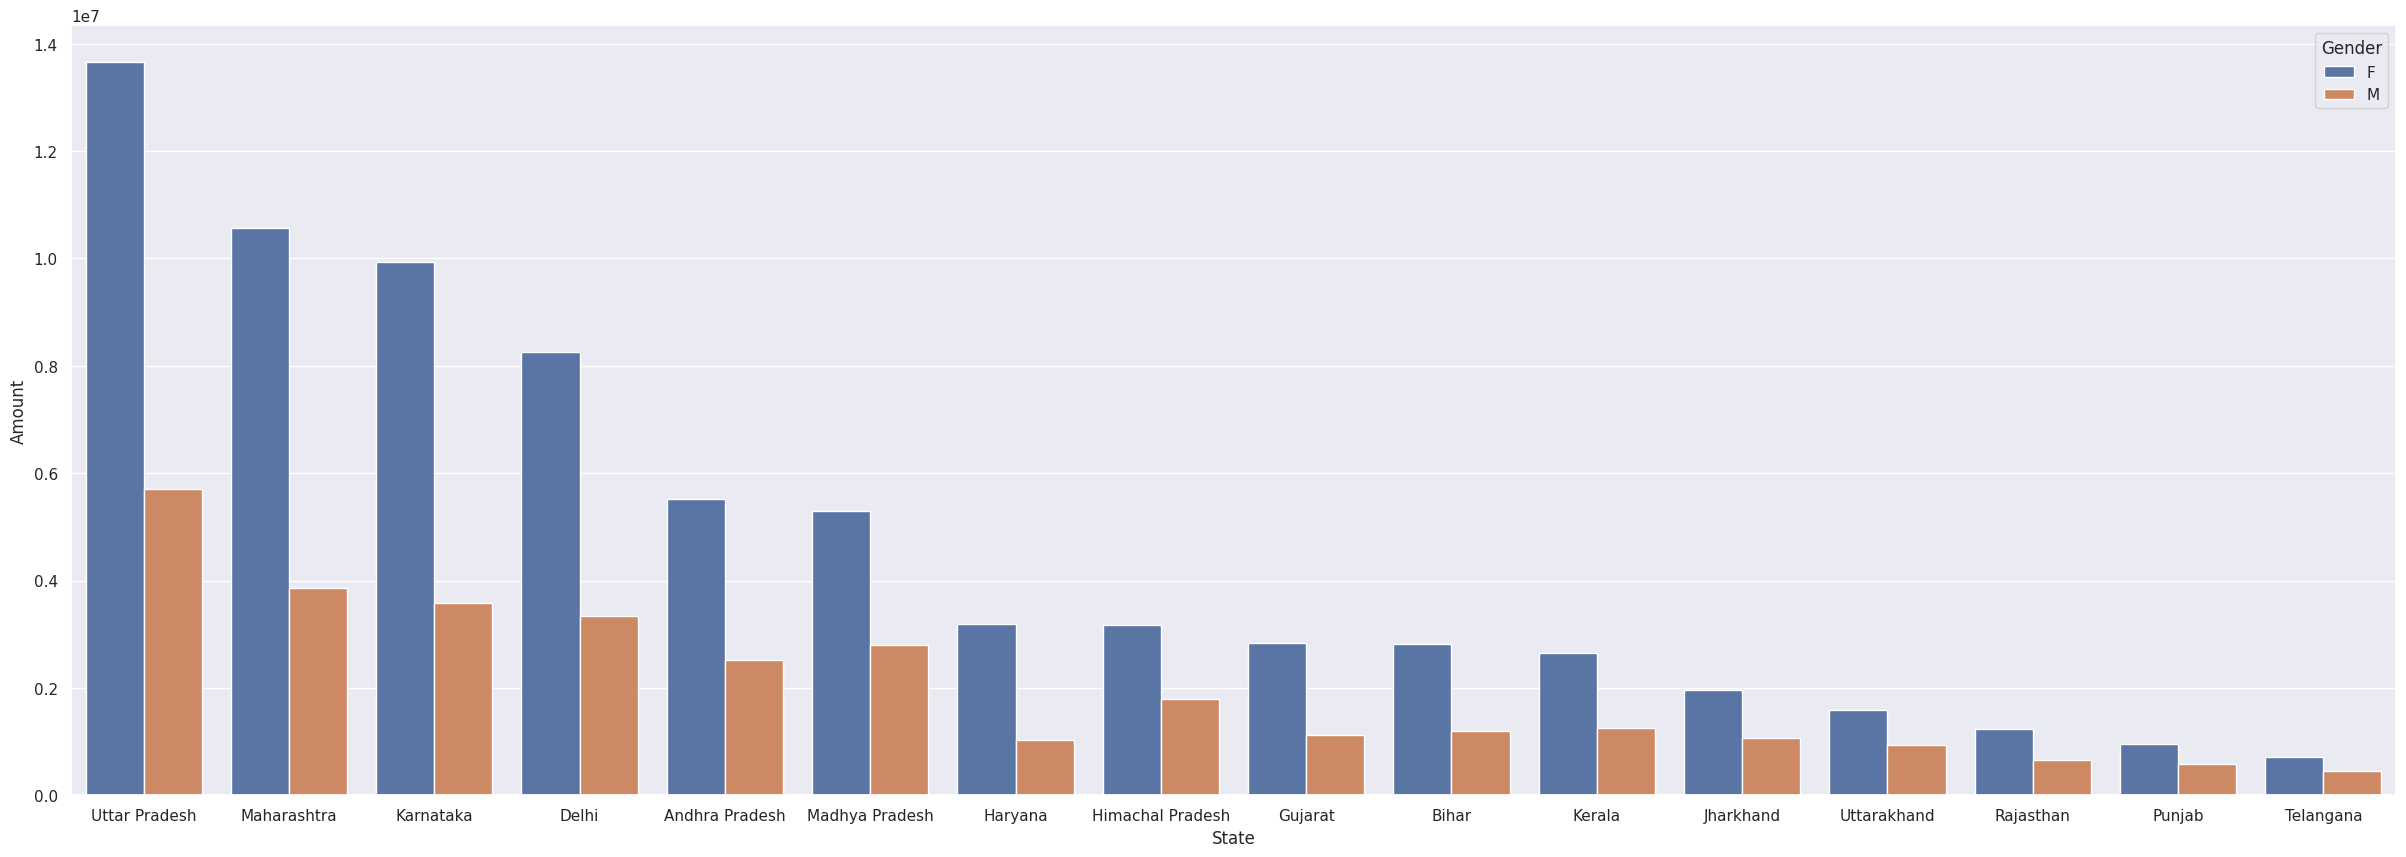

In [40]:
#total number of orders from top 10 states, based on Gender
order_state = df.groupby(['Gender','State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(data = order_state, x = 'State', y = 'Amount',hue = 'Gender', palette = 'deep')

The above graphs confirms that in all states females are the majority client.

###Marital Status

<ipython-input-41-70b6784261fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Marital_Status',palette = 'deep')


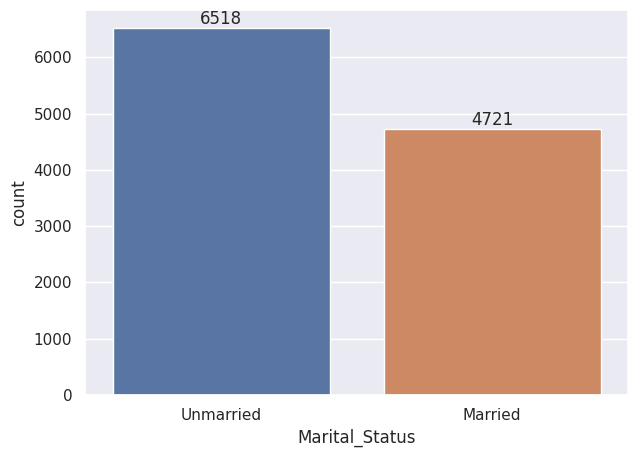

In [41]:
#to check how many consumers are married
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(data = df, x = 'Marital_Status',palette = 'deep')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

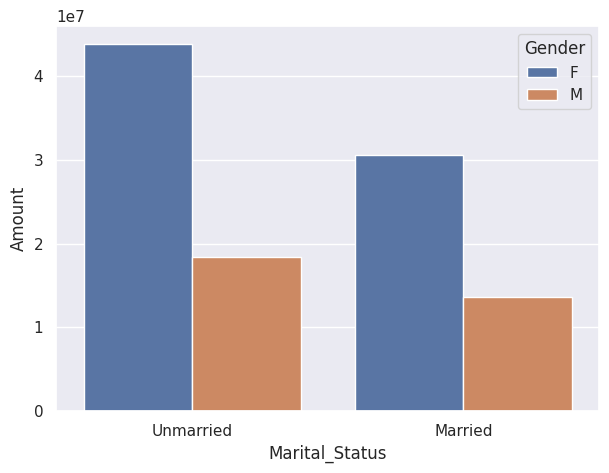

In [42]:
marital_amt = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(
                by = 'Amount', ascending = False)
sns.barplot(data = marital_amt, x= 'Marital_Status', y ='Amount', hue = 'Gender', palette = 'deep')

From the above 2 graphs, it can be observed that most of our consumers are unmarried. and if we consider gender and marital status, then it can be seen that most of the consumers are unmarried women, followed by married women and then unmarried men.

###Occupation

<ipython-input-43-e2c820465c19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Occupation' , order = df['Occupation'].value_counts().index, palette = 'Set2')


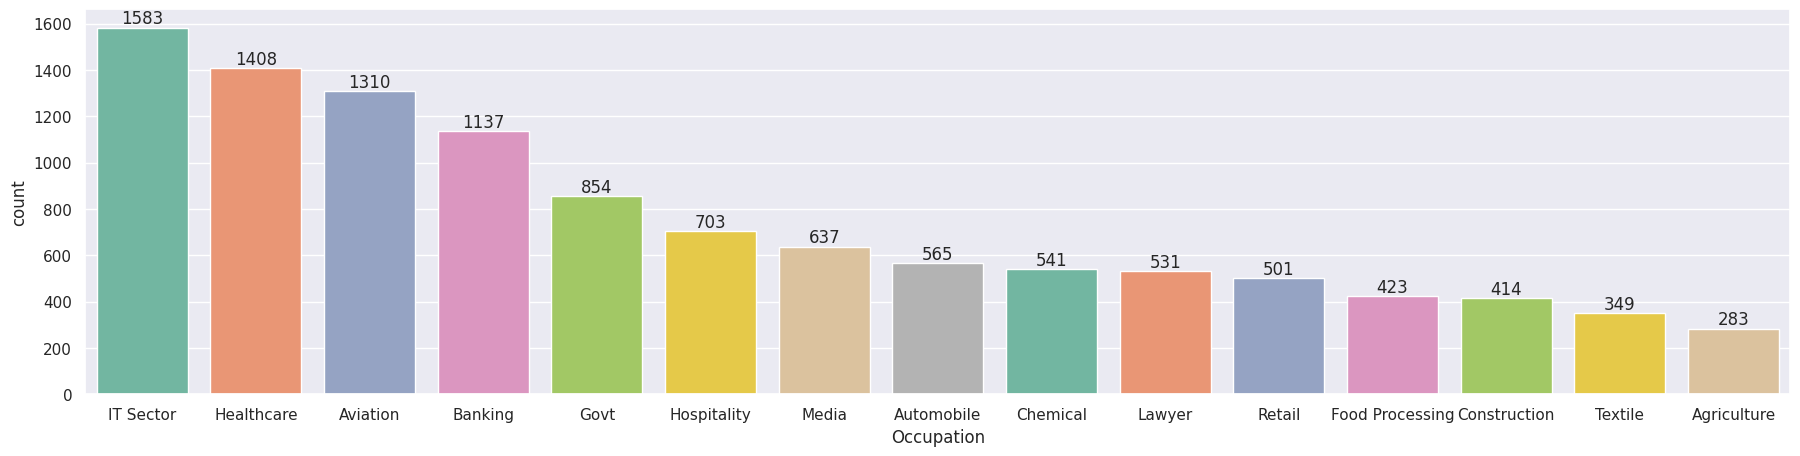

In [43]:
#Consumer's occupation
sns.set(rc={'figure.figsize':(22,5)})
ax = sns.countplot(data = df, x = 'Occupation' , order = df['Occupation'].value_counts().index, palette = 'Set2')
for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-44-62a63c606abf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = occ_amount, x = 'Occupation', y ='Amount', palette = 'Set2')


<Axes: xlabel='Occupation', ylabel='Amount'>

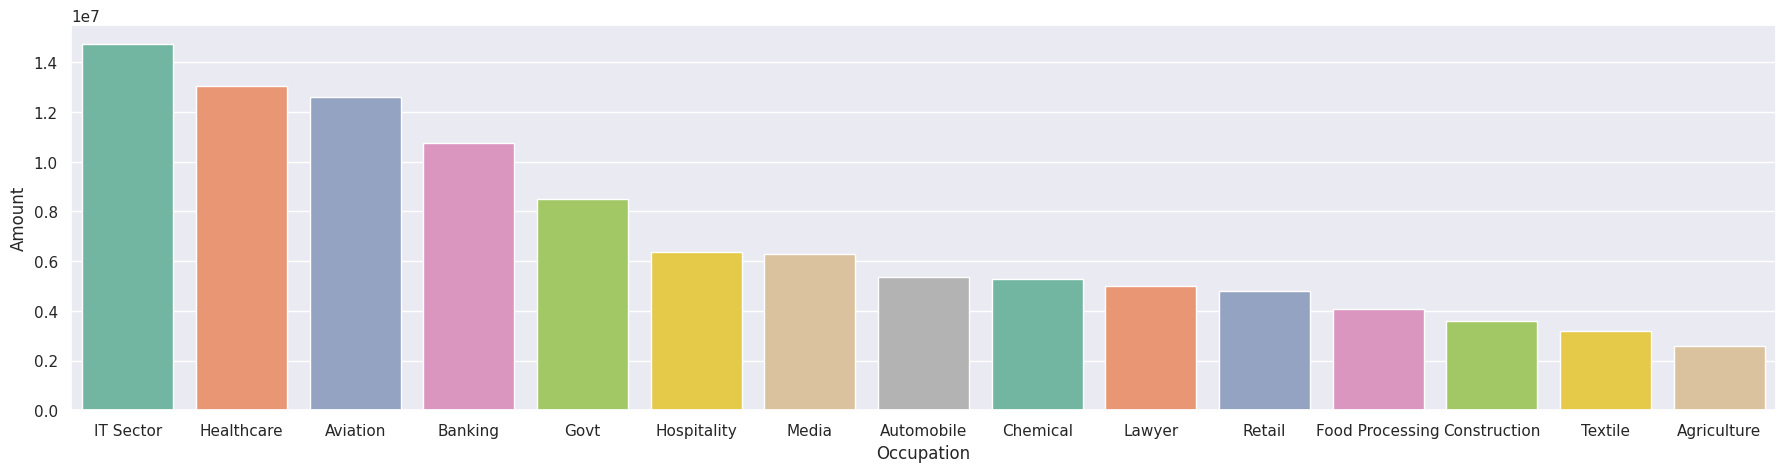

In [44]:
#Amount spent by consumer occupation
occ_amount = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(data = occ_amount, x = 'Occupation', y ='Amount', palette = 'Set2')

From the above graphs, it cam be seen that most of the consumers are working in IT Sector followed by Healthcare and Aviation. The order is same for the count of consumers as well as their purchasing power.

In [45]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

###Product Category

<ipython-input-46-9ad866917574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Product_Category',order = df['Product_Category'].value_counts().index, palette = 'Set2')


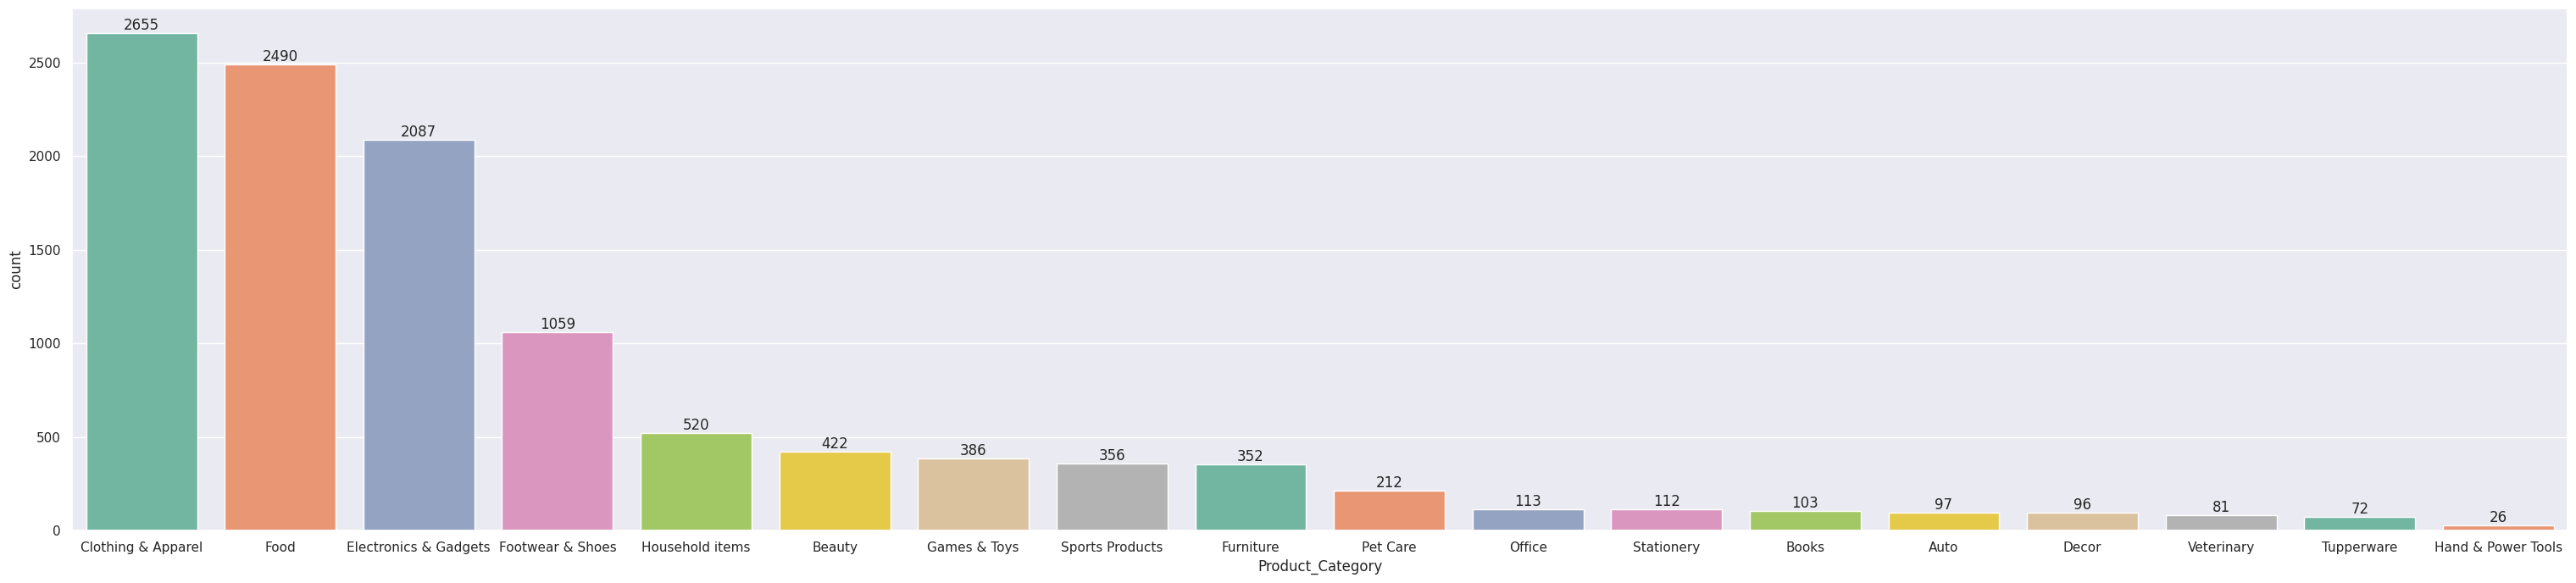

In [46]:
#product category wise count
sns.set(rc={'figure.figsize':(38,8)})
ax = sns.countplot(data = df, x = 'Product_Category',order = df['Product_Category'].value_counts().index, palette = 'Set2')
for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-47-cf27c9c86a08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = amt_pc, x = 'Product_Category', y = 'Amount', palette = 'Set2')


<Axes: xlabel='Product_Category', ylabel='Amount'>

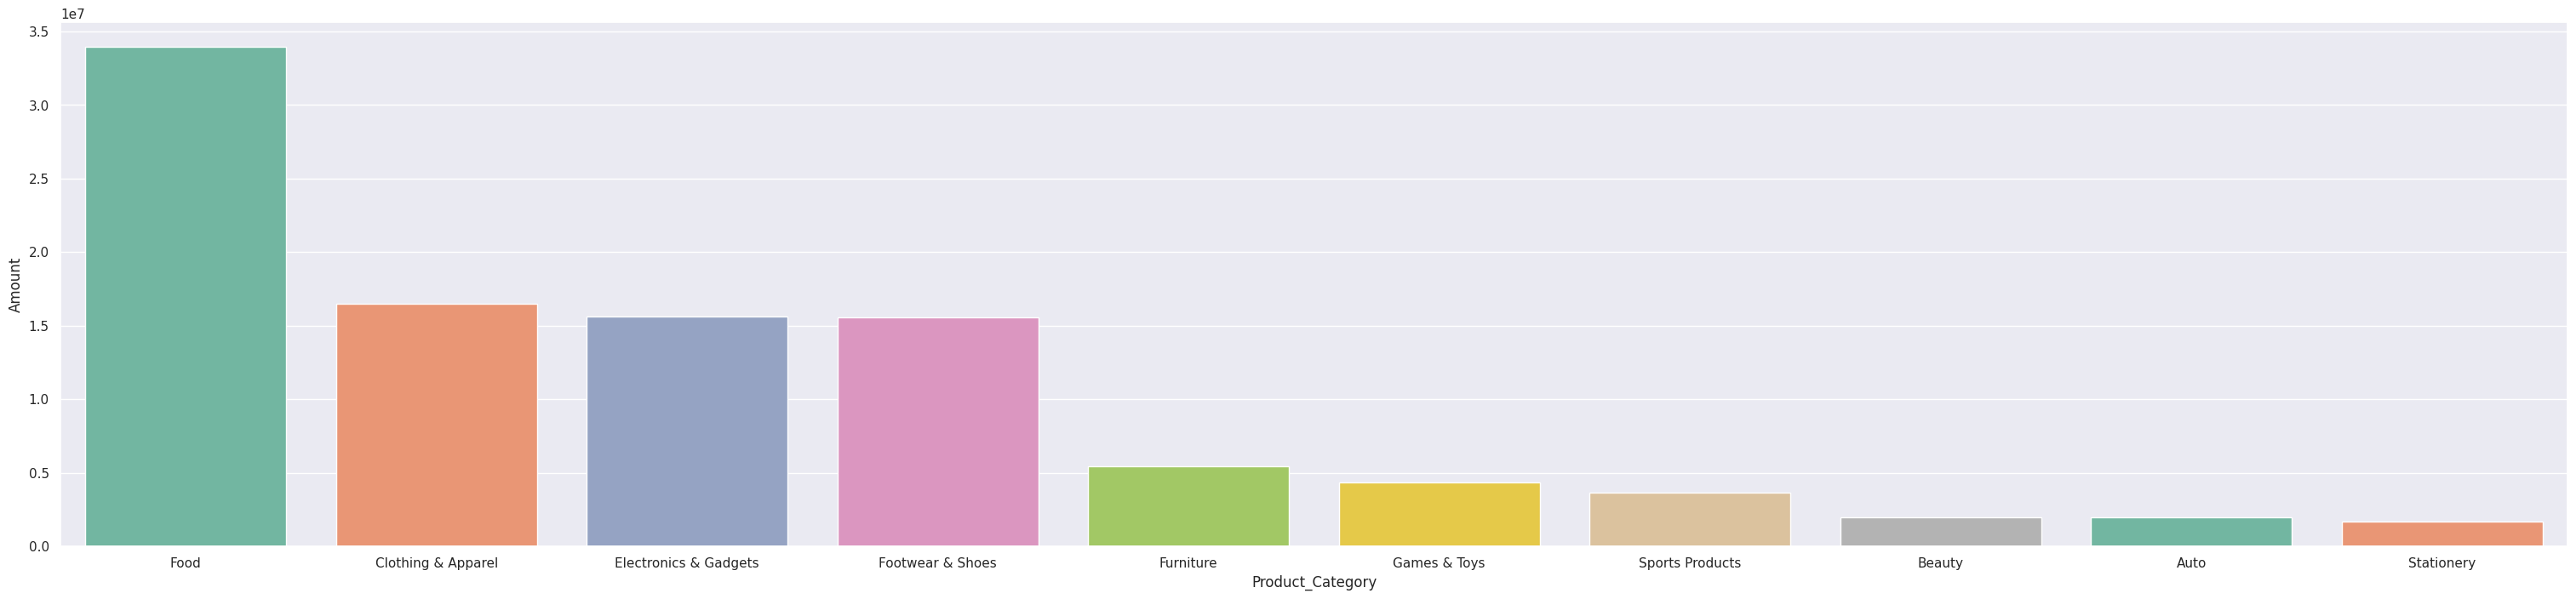

In [47]:
#Amount per Product Category
amt_pc = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(
                  by = 'Amount', ascending = False).head(10)
sns.barplot(data = amt_pc, x = 'Product_Category', y = 'Amount', palette = 'Set2')

From the above two graphs it can be seen that clothing, food and electronics are the categories with the most number of orders.Eventhough more numbers of orders are placed in clothing category, food is the category on which most of the amount is spent by the consumers followed by clothing and electronics.

<ipython-input-51-6fcfb836411b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Product_ID', order = df['Product_ID'].value_counts().nlargest(10).index, palette = 'Set2')


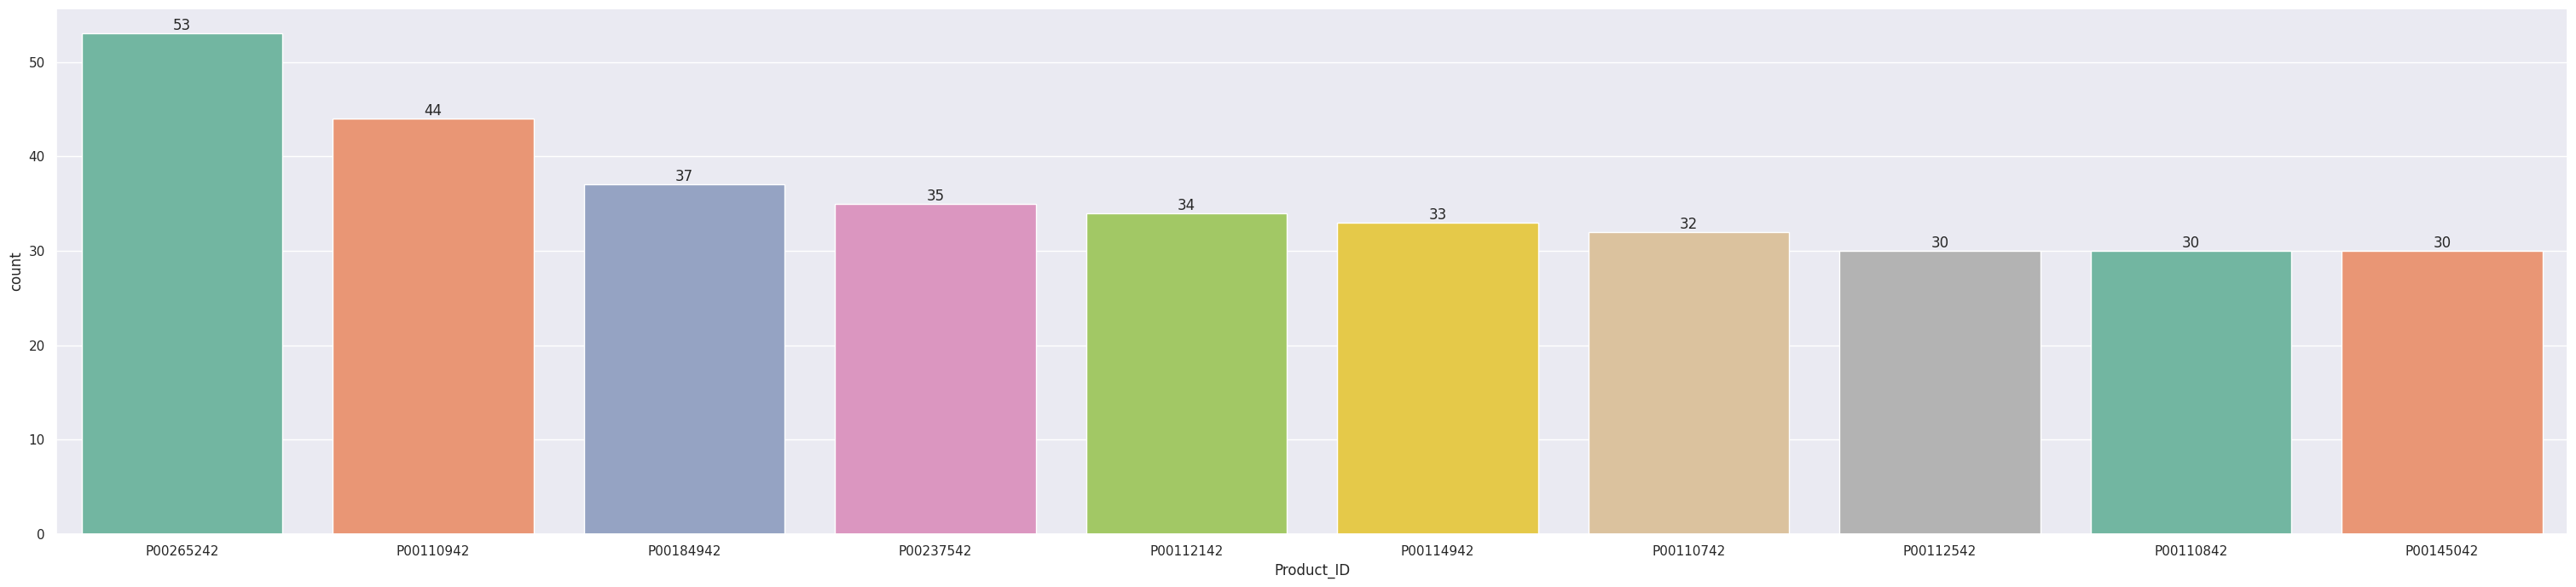

In [51]:
#Top 10 most sold products
ax = sns.countplot(data = df, x = 'Product_ID', order = df['Product_ID'].value_counts().nlargest(10).index, palette = 'Set2')
for bars in ax.containers:
  ax.bar_label(bars)

##Conclusion
Unmarried women of the age group 26-35 yrs from the states UP, Maharashtra and Karnataka working in the IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.